In [2]:
import pandas as pd

books = pd.read_csv("books_with_categories.csv")


In [4]:
from transformers import pipeline
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=True,
                      top_k = None,
                      device= 0)
classifier("I love this!")

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528684265911579},
  {'label': 'neutral', 'score': 0.0057645998895168304},
  {'label': 'anger', 'score': 0.004419790115207434},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.0016119939973577857},
  {'label': 'fear', 'score': 0.0004138521908316761}]]

In [6]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [7]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548405289649963},
  {'label': 'neutral', 'score': 0.1698525995016098},
  {'label': 'sadness', 'score': 0.11640887707471848},
  {'label': 'surprise', 'score': 0.020700683817267418},
  {'label': 'disgust', 'score': 0.019100695848464966},
  {'label': 'joy', 'score': 0.01516138669103384},
  {'label': 'anger', 'score': 0.003935149405151606}]]

In [8]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296029329299927},
  {'label': 'neutral', 'score': 0.14038555324077606},
  {'label': 'fear', 'score': 0.06816220283508301},
  {'label': 'joy', 'score': 0.0479423925280571},
  {'label': 'anger', 'score': 0.00915635097771883},
  {'label': 'disgust', 'score': 0.0026284747291356325},
  {'label': 'sadness', 'score': 0.0021221598144620657}],
 [{'label': 'neutral', 'score': 0.4493706226348877},
  {'label': 'disgust', 'score': 0.2735918462276459},
  {'label': 'joy', 'score': 0.10908296704292297},
  {'label': 'sadness', 'score': 0.09362707287073135},
  {'label': 'anger', 'score': 0.04047832265496254},
  {'label': 'surprise', 'score': 0.026970142498612404},
  {'label': 'fear', 'score': 0.006879038643091917}],
 [{'label': 'neutral', 'score': 0.6462165117263794},
  {'label': 'sadness', 'score': 0.2427329570055008},
  {'label': 'disgust', 'score': 0.04342258349061012},
  {'label': 'surprise', 'score': 0.028300510719418526},
  {'label': 'joy', 'score': 0.0142114739

In [10]:
sentence = books["description"][0].split(".")
predictions = classifier(sentence)

In [11]:
sentence[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [12]:
predictions[0]

[{'label': 'surprise', 'score': 0.7296029329299927},
 {'label': 'neutral', 'score': 0.14038555324077606},
 {'label': 'fear', 'score': 0.06816220283508301},
 {'label': 'joy', 'score': 0.0479423925280571},
 {'label': 'anger', 'score': 0.00915635097771883},
 {'label': 'disgust', 'score': 0.0026284747291356325},
 {'label': 'sadness', 'score': 0.0021221598144620657}]

In [17]:
sentence[5]

' Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer'

In [18]:
predictions[5]

[{'label': 'joy', 'score': 0.9327970147132874},
 {'label': 'disgust', 'score': 0.0377177968621254},
 {'label': 'neutral', 'score': 0.01589193567633629},
 {'label': 'sadness', 'score': 0.00644455011934042},
 {'label': 'anger', 'score': 0.005025019869208336},
 {'label': 'surprise', 'score': 0.0015812077326700091},
 {'label': 'fear', 'score': 0.0005423104739747941}]

In [19]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.00915635097771883},
 {'label': 'disgust', 'score': 0.0026284747291356325},
 {'label': 'fear', 'score': 0.06816220283508301},
 {'label': 'joy', 'score': 0.0479423925280571},
 {'label': 'neutral', 'score': 0.14038555324077606},
 {'label': 'sadness', 'score': 0.0021221598144620657},
 {'label': 'surprise', 'score': 0.7296029329299927}]

In [22]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index,  label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}



In [23]:
for i in range(10):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
emotion_scores

[0.9327970147132874,
 0.7044219374656677,
 0.7672367691993713,
 0.2518811821937561,
 0.0405643992125988,
 0.043375857174396515,
 0.8725654482841492,
 0.0405643992125988,
 0.0405643992125988,
 0.0405643992125988]

In [26]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [03:13<00:00, 26.86it/s]


In [27]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] =  isbn

In [30]:
emotions_df.head(10)

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273592,0.928168,0.932797,0.646217,0.967158,0.729603,9780002005883
1,0.612618,0.348285,0.942528,0.704422,0.887940,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078765,9780006178736
3,0.351484,0.150723,0.360707,0.251881,0.732685,0.111690,0.078765,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078765,9780006280934
5,0.232225,0.727175,0.051363,0.043376,0.621393,0.111690,0.271903,9780006380832
6,0.538185,0.155855,0.747428,0.872565,0.712195,0.408000,0.078765,9780006470229
7,0.064134,0.104007,0.404496,0.040564,0.549477,0.820283,0.234487,9780006472612
8,0.300670,0.279481,0.915524,0.040564,0.840289,0.354460,0.135614,9780006482079
9,0.064134,0.177928,0.051363,0.040564,0.860372,0.111690,0.078765,9780006483014


In [31]:
books = pd.merge(books, emotions_df, on = "isbn13")

In [32]:
books.head(10)

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273592,0.928168,0.932797,0.646217,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612618,0.348285,0.942528,0.704422,0.887940,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360707,0.251881,0.732685,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078765
5,9780006380832,0006380832,Empires of the Monsoon,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,...,Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...,Nonfiction,0.232225,0.727175,0.051363,0.043376,0.621393,0.111690,0.271903
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,...,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...,Fiction,0.538185,0.155855,0.747428,0.872565,0.712195,0.408000,0.078765
7,9780006472612,0006472613,Master of the Game,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,...,Master of the Game,9780006472612 Kate Blackwell is an enigma and ...,Nonfiction,0.064134,0.104007,0.404496,0.040564,0.549477,0.820283,0.234487
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,...,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction,0.300670,0.279481,0.915524,0.040564,0.840289,0.354460,0.135614
9,9780006483014,0006483011,The Once and Future King,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,...,The Once and Future King,9780006483014 An omnibus volume of the author'...,Fiction,0.064134,0.177928,0.051363,0.040564,0.860372,0.111690,0.078765


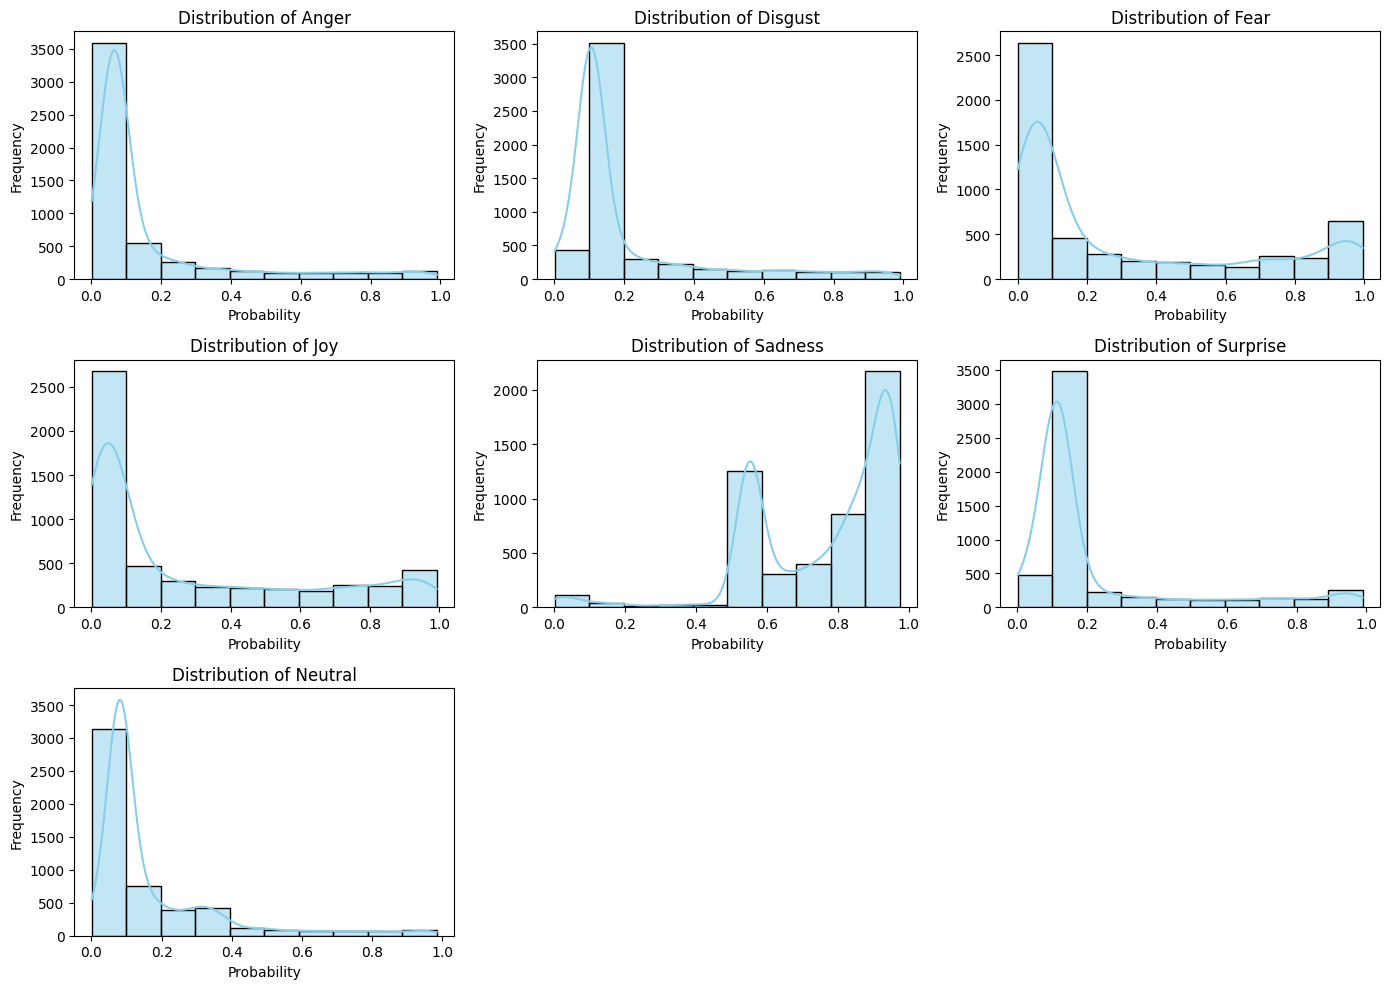

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))


emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']


for i, emotion in enumerate(emotions, 1):
    plt.subplot(3, 3, i)
    sns.histplot(books[emotion], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {emotion.capitalize()}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
books.to_csv("books_with_emotions.csv", index = False)